In [1]:
# Import Statistics Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

# Sklearn Libraries for Classification ML
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

# Save and Load Libraries
import pickle

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data untuk dataset EDA
df = pd.read_csv('cloning2.csv')
df

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,work_phone,phone,email,family_size,status,start_date,snapshot_month,months_balance,credit_approval,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,X,2021-09-01,2021-09-01,0,No,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,0,2021-09-01,2021-10-01,-1,No,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,1,2021-09-01,2021-11-01,-2,No,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2021-12-01,-3,No,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-01-01,-4,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777542,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,1.0,0,2021-11-01,2022-08-01,-9,No,1
777543,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,1.0,0,2021-11-01,2022-09-01,-10,No,1
777544,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,1.0,0,2021-11-01,2022-10-01,-11,No,1
777545,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,1.0,0,2021-11-01,2022-11-01,-12,No,1


In [3]:
print(df['work_phone'].unique())
print(df['phone'].unique())
print(df['email'].unique())
print(df['income'].unique())

[1 0]
[0 1]
[0 1]
[ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   110250.
  472500.   196650.   630000.   432000.   257625.   143100.   207000.
  288000.   131400.   720000.   261000.    99900.    38250.   175500.
   49500.    83250.   119250.    63000.   274500.    90900.   220500.
  

In [4]:
df['age'] = (-df['days_birth'] // 365)
df['years_employed'] = df['days_employed'].apply(lambda x: 0 if x > 0 else int(-x // 365))

In [5]:
print(df['education'].unique())

['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [6]:
edu_order = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

df['education_ordinal'] = df['education'].map(edu_order)

In [7]:
df['education_income_ratio'] = df['education_ordinal'] / df['income']

In [8]:
df.isna().sum()

id                        0
gender                    0
car                       0
realty                    0
child_number              0
income                    0
occupation                0
education                 0
marital_status            0
house_type                0
days_birth                0
days_employed             0
mobile_phone              0
work_phone                0
phone                     0
email                     0
family_size               0
status                    0
start_date                0
snapshot_month            0
months_balance            0
credit_approval           0
target                    0
age                       0
years_employed            0
education_ordinal         0
education_income_ratio    0
dtype: int64

In [9]:
# Splitting antara X dan Y
X = df.drop(['target', 'id', 'credit_approval', 'start_date', 'snapshot_month', 'education_ordinal','education', 'income', 'days_birth', 'days_employed'], axis=1) # Features
y = df['target'] # Target

In [10]:
# Splitting antara train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (622037, 17)
Test Size (155510, 17)


In [11]:
# Set menjadi kategory
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(exclude='object').columns)
exclude_cols = ['work_phone', 'email', 'phone']

num_cols = [col for col in num_cols if col not in exclude_cols]

print(num_cols)
print(cat_cols)
print(exclude_cols)

['child_number', 'mobile_phone', 'family_size', 'months_balance', 'age', 'years_employed', 'education_income_ratio']
['gender', 'car', 'realty', 'occupation', 'marital_status', 'house_type', 'status']
['work_phone', 'email', 'phone']


In [12]:
# Set display untuk filter kolom nantinya
pd.set_option('display.max_colwidth', None)

listCols = []
for col in cat_cols:
    listCols.append([col, X_train[col].nunique(), X[col].unique()])


pd.DataFrame(columns=['Nama Kolom', 'Jumlah Nilai Unique', 'Nilai Unique'], data=listCols)

,Nama Kolom,Jumlah Nilai Unique,Nilai Unique
0,gender,2,"[M, F]"
1,car,2,"[Y, N]"
2,realty,2,"[Y, N]"
3,occupation,5,"[Working, Commercial associate, Pensioner, State servant, Student]"
4,marital_status,5,"[Civil marriage, Married, Single / not married, Separated, Widow]"
5,house_type,6,"[Rented apartment, House / apartment, Municipal apartment, With parents, Co-op apartment, Office apartment]"
6,status,8,"[X, 0, 1, C, 2, 3, 4, 5]"


In [13]:
# Display skewness distributions and outliers

# Buat dataframe skewness dahulu dari kolom numerik
listCols2= []
for col in num_cols:
  listCols2.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),2) <= 0.5) & (round(X_train[col].skew(),2) >= -0.5),
    'normal','skewed')])

skewness = pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness', 'Distribution'], data= listCols2)
skewness

# Buat dataframe persentase outliers dahulu dari kolom numerik
column = []
lower_bound = []
upper_bound = []
Percentage_Outliers = []
for row in range (0, len(skewness)):
  col = skewness['Nama Kolom'][row]
  #checking upper and lower boundary
  if skewness['Distribution'][row] == 'Skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  Percentage_Outliers.append(totout)


outliers = pd.DataFrame({
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'Percentage Outliers': [round(Percentage_Outliers,2) for Percentage_Outliers in Percentage_Outliers],   
})

# Concat and Merge the two
frames = [skewness, outliers]
Skewness_Outliers = pd.concat(frames, ignore_index=False, axis=1)
Skewness_Outliers

,Nama Kolom,Nilai Skewness,Distribution,upper_boundary,lower_boundary,Percentage Outliers
0,child_number,2.5,skewed,2.66,-1.81,1.43
1,mobile_phone,0.0,normal,1.00,1.00,0.00
2,family_size,1.3,skewed,4.93,-0.51,1.38
3,months_balance,-0.9,skewed,22.53,-53.29,0.51
4,age,0.2,normal,77.39,9.94,0.00
5,years_employed,1.7,skewed,25.79,-13.89,2.03
6,education_income_ratio,2.3,skewed,0.00,-0.00,1.29


In [14]:
# Definisikan pipeline untuk numerikal kolom dataset 2
num_transformer_data2 = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler',MinMaxScaler())
])

# Definisikan pipeline untuk kategorikal kolom dataset 2
cat_transformer_data2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline untuk preprocessing dataset 2
preprocessor2 = ColumnTransformer(transformers=[
    ('numerical', num_transformer_data2, num_cols),
    ('categorical', cat_transformer_data2, cat_cols),
    ('num_passthrough', 'passthrough', exclude_cols)
])

In [16]:
# Pipeline to stream data into decision tree model
tree_pipeline_data2 = Pipeline(steps=[
    ('preprocessing', preprocessor2),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

RF_pipeline_data2 = Pipeline(steps=[
    ('preprocessing', preprocessor2),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [20]:
# Tree Pipeline dataset 2 Training
tree_pipeline_data2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['child_number',
                                                   'mobile_phone',
                                                   'family_size',
                                                   'months_balance', 'age',
                                                   'years_employed',
                                                   'education_income_ratio']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'car', 'realty',
                                                   'occupation',
                                                   'marital_status',
                                                   'house_type', 'status']),
                                                 ('num_passthrough',
                                                  'passthrough',
                                                  ['work_phone', 'email',
                                                   'phone'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [18]:
RF_pipeline_data2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['child_number',
                                                   'mobile_phone',
                                                   'family_size',
                                                   'months_balance', 'age',
                                                   'years_employed',
                                                   'education_income_ratio']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'car', 'realty',
                                                   'occupation',
                                                   'marital_status',
                                                   'house_type', 'status']),
                                                 ('num_passthrough',
                                                  'passthrough',
                                                  ['work_phone', 'email',
                                                   'phone'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Train set:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98    534515
           1       0.95      0.78      0.85     87522

    accuracy                           0.96    622037
   macro avg       0.95      0.88      0.92    622037
weighted avg       0.96      0.96      0.96    622037

----------------------------------------------------------------
Test set:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    133630
           1       0.80      0.69      0.74     21880

    accuracy                           0.93    155510
   macro avg       0.88      0.83      0.85    155510
weighted avg       0.93      0.93      0.93    155510

Confusion Matrix Test 2 (Log Reg)     : 


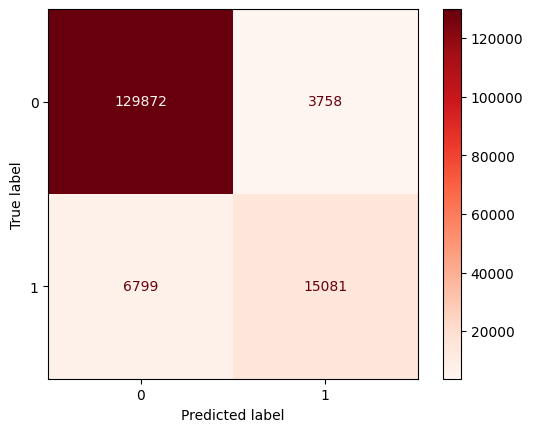

In [21]:
# Predict using train and test set Log Reg
y_pred_train = tree_pipeline_data2.predict(X_train)
y_pred_test = tree_pipeline_data2.predict(X_test)

# Show classification report
print('Train set:\n', classification_report(y_train, y_pred_train))
print('----------------------------------------------------------------')
print('Test set:\n', classification_report(y_test, y_pred_test))

# Display Confussion Matrix Test
print('Confusion Matrix Test 2 (Log Reg)     : \n', ConfusionMatrixDisplay.from_estimator(tree_pipeline_data2, X_test, y_test, cmap='Reds'))

Train set:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    534515
           1       0.90      0.82      0.86     87522

    accuracy                           0.96    622037
   macro avg       0.94      0.90      0.92    622037
weighted avg       0.96      0.96      0.96    622037

----------------------------------------------------------------
Test set:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96    133630
           1       0.79      0.72      0.76     21880

    accuracy                           0.93    155510
   macro avg       0.87      0.85      0.86    155510
weighted avg       0.93      0.93      0.93    155510

Confusion Matrix Test 2 (Log Reg)     : 


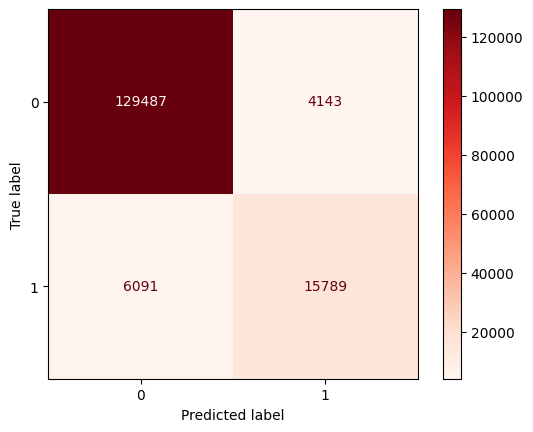

In [19]:
# Predict using train and test set Log Reg
y_pred_train_RF = RF_pipeline_data2.predict(X_train)
y_pred_test_RF = RF_pipeline_data2.predict(X_test)

# Show classification report
print('Train set:\n', classification_report(y_train, y_pred_train_RF))
print('----------------------------------------------------------------')
print('Test set:\n', classification_report(y_test, y_pred_test_RF))

# Display Confussion Matrix Test
print('Confusion Matrix Test 2 (Log Reg)     : \n', ConfusionMatrixDisplay.from_estimator(RF_pipeline_data2, X_test, y_test, cmap='Reds'))